# Notes
- Last updated 3/29 11pm

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
# Get counties
top_county_file = "Zillow CSV results/top_counties_ppsf.csv"
top_county_df = pd.read_csv(top_county_file, encoding="latin")
bottom_county_file = "Zillow CSV results/bottom_counties_ppsf.csv"
bottom_county_df = pd.read_csv(bottom_county_file, encoding="latin")

In [3]:
# Clean up counties (Top)

top_county_df['RegionName'] = top_county_df['RegionName'].str.replace(" County", "")
top_county_df['County'] = top_county_df['RegionName'] + ", " + top_county_df['State']

top_county_clean = top_county_df[['County']]
top_county_clean = top_county_clean.iloc[::-1].reset_index(drop=True)
top_county_clean

,County
0,"District of Columbia, DC"
1,"Santa Cruz, CA"
2,"Santa Barbara, CA"
3,"Honolulu, HI"
4,"Kauai, HI"
5,"Eagle, CO"
6,"Maui, HI"
7,"Summit, UT"
8,"Suffolk, MA"
9,"Marin, CA"


In [4]:
# Clean up counties (Bottom)
bottom_county_df['RegionName'] = bottom_county_df['RegionName'].str.replace(" County", "")
bottom_county_df['County'] = bottom_county_df['RegionName'] + ", " + bottom_county_df['State']

bottom_county_clean = bottom_county_df[['County']]
bottom_county_clean

,County
0,"Monroe, AL"
1,"Haskell, TX"
2,"Mitchell, TX"
3,"Wyoming, WV"
4,"Jackson, AR"
5,"Morris, TX"
6,"Falls, TX"
7,"Labette, KS"
8,"Hutchinson, TX"
9,"Randolph, IN"


In [5]:
# Get health factor data and clean up
health_factor_path = "raw data/2018_all_county_data_1.csv"
health_factor_df = pd.read_csv(health_factor_path, encoding="latin")

health_factor_df["State"] = health_factor_df["State"].replace({'Alabama' : 'AL', 'Alaska' : 'AK', 'Arizona' : 'AZ', 'Arkansas' : 'AR', 'California' : 'CA', 'Colorado' : 'CO', 'Connecticut' : 'CT', 'Delaware' : 'DE', 'Florida' : 'FL', 'Georgia' : 'GA', 'Hawaii' : 'HI', 'Idaho' : 'ID', 'Illinois' : 'IL', 'Indiana' : 'IN', 'Iowa' : 'IA', 'Kansas' : 'KS', 'Kentucky' : 'KY', 'Louisiana' : 'LA', 'Maine' : 'ME', 'Maryland' : 'MD', 'Massachusetts' : 'MA', 'Michigan' : 'MI', 'Minnesota' : 'MN', 'Mississippi' : 'MS', 'Missouri' : 'MO', 'Montana' : 'MT', 'Nebraska' : 'NE', 'Nevada' : 'NV', 'New Hampshire' : 'NH', 'New Jersey' : 'NJ', 'New Mexico' : 'NM', 'New York' : 'NY', 'North Carolina' : 'NC', 'North Dakota' : 'ND', 'Ohio' : 'OH', 'Oklahoma' : 'OK', 'Oregon' : 'OR', 'Pennsylvania' : 'PA', 'Rhode Island' : 'RI', 'South Carolina' : 'SC', 'South Dakota' : 'SD', 'Tennessee' : 'TN', 'Texas' : 'TX', 'Utah' : 'UT', 'Vermont' : 'VT', 'Virginia' : 'VA', 'Washington' : 'WA', 'West Virginia' : 'WV', 'Wisconsin' : 'WI', 'Wyoming' : 'WY'})
health_factor_df['County'] = health_factor_df["County"] + ", " + health_factor_df["State"]

In [6]:
# Get health factor data 2 and clean up
health_factor_path2 = "raw data/2018_all_county_data_2.csv"
health_factor_df2 = pd.read_csv(health_factor_path2, encoding="latin")

health_factor_df2["State"] = health_factor_df2["State"].replace({'Alabama' : 'AL', 'Alaska' : 'AK', 'Arizona' : 'AZ', 'Arkansas' : 'AR', 'California' : 'CA', 'Colorado' : 'CO', 'Connecticut' : 'CT', 'Delaware' : 'DE', 'Florida' : 'FL', 'Georgia' : 'GA', 'Hawaii' : 'HI', 'Idaho' : 'ID', 'Illinois' : 'IL', 'Indiana' : 'IN', 'Iowa' : 'IA', 'Kansas' : 'KS', 'Kentucky' : 'KY', 'Louisiana' : 'LA', 'Maine' : 'ME', 'Maryland' : 'MD', 'Massachusetts' : 'MA', 'Michigan' : 'MI', 'Minnesota' : 'MN', 'Mississippi' : 'MS', 'Missouri' : 'MO', 'Montana' : 'MT', 'Nebraska' : 'NE', 'Nevada' : 'NV', 'New Hampshire' : 'NH', 'New Jersey' : 'NJ', 'New Mexico' : 'NM', 'New York' : 'NY', 'North Carolina' : 'NC', 'North Dakota' : 'ND', 'Ohio' : 'OH', 'Oklahoma' : 'OK', 'Oregon' : 'OR', 'Pennsylvania' : 'PA', 'Rhode Island' : 'RI', 'South Carolina' : 'SC', 'South Dakota' : 'SD', 'Tennessee' : 'TN', 'Texas' : 'TX', 'Utah' : 'UT', 'Vermont' : 'VT', 'Virginia' : 'VA', 'Washington' : 'WA', 'West Virginia' : 'WV', 'Wisconsin' : 'WI', 'Wyoming' : 'WY'})
health_factor_df2['County'] = health_factor_df2["County"] + ", " + health_factor_df2["State"]

# Percent Diabetic

In [7]:
# Specific health factor 
diabetic = health_factor_df2[["County", "% Diabetic"]]
diabetic.head()

,County,% Diabetic
0,"Autauga, AL",12
1,"Baldwin, AL",11
2,"Barbour, AL",18
3,"Bibb, AL",15
4,"Blount, AL",14


In [8]:
# Make merge for plotting
top_county_data = pd.merge(top_county_clean, diabetic, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, diabetic, on='County', how='left')
bottom_county_data.head()

,County,% Diabetic
0,"Monroe, AL",16
1,"Haskell, TX",11
2,"Mitchell, TX",9
3,"Wyoming, WV",16
4,"Jackson, AR",13


In [9]:
# Get p-value
pop1 = top_county_data['% Diabetic']
pop2 = bottom_county_data["% Diabetic"]
pop1.fillna(0, inplace=True)
pop2.fillna(0, inplace=True)
stats.ttest_ind(pop1, pop2, equal_var=False)

Ttest_indResult(statistic=-7.496335107326312, pvalue=7.458323845151411e-09)

Text(0.5, 1.0, 'Percent Diabetic in Top 20 and Bottom 20 Counties')

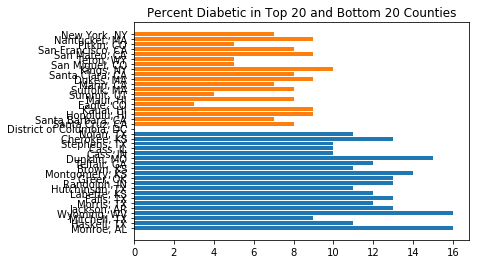

In [10]:
# Plot
plt.barh(bottom_county_data['County'], bottom_county_data['% Diabetic'])

plt.barh(top_county_data['County'], top_county_data['% Diabetic'])
plt.title("Percent Diabetic in Top 20 and Bottom 20 Counties")


# Percent Uninsured

In [11]:
# Specific health factor 
uninsured_rate = health_factor_df[["County", "% Uninsured"]]
uninsured_rate.head()

,County,% Uninsured
0,"Autauga, AL",9.0
1,"Baldwin, AL",12.0
2,"Barbour, AL",13.0
3,"Bibb, AL",12.0
4,"Blount, AL",14.0


In [12]:
# Make merge for plotting

top_county_data = pd.merge(top_county_clean, uninsured_rate, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, uninsured_rate, on='County', how='left')
bottom_county_data.head()

,County,% Uninsured
0,"Monroe, AL",14.0
1,"Haskell, TX",21.0
2,"Mitchell, TX",19.0
3,"Wyoming, WV",8.0
4,"Jackson, AR",11.0


In [13]:
# Get p-value
pop1 = top_county_data['% Uninsured']
pop2= bottom_county_data["% Uninsured"]
pop1.fillna(0, inplace=True)
pop2.fillna(0, inplace=True)
stats.ttest_ind(pop1, pop2, equal_var=False)

Ttest_indResult(statistic=-5.549049974292747, pvalue=2.5867254398739256e-06)

Text(0.5, 1.0, 'Percent Uninsured in Top 20 and Bottom 20 Counties')

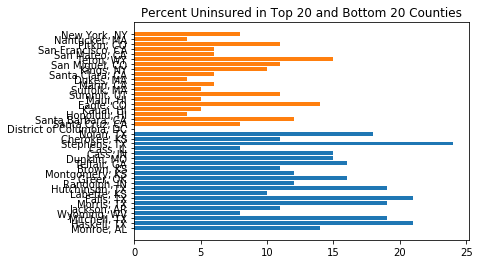

In [14]:
# Plot
plt.barh(bottom_county_data['County'], bottom_county_data['% Uninsured'])

plt.barh(top_county_data['County'], top_county_data['% Uninsured'])
plt.title("Percent Uninsured in Top 20 and Bottom 20 Counties")

In [15]:
# Make plot prettier

In [16]:
# Export plot

# PCP Rate
primary care physician per 100,000 population

In [17]:
# Get specific health factor data

PCP_rate_df = health_factor_df[["County", "PCP Rate"]]
PCP_rate_df.head()

,County,PCP Rate
0,"Autauga, AL",45.0
1,"Baldwin, AL",73.0
2,"Barbour, AL",42.0
3,"Bibb, AL",53.0
4,"Blount, AL",21.0


In [18]:
# Make merge for plotting
top_county_data = pd.merge(top_county_clean, PCP_rate_df, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, PCP_rate_df, on='County', how='left')
bottom_county_data.head()

,County,PCP Rate
0,"Monroe, AL",32.0
1,"Haskell, TX",52.0
2,"Mitchell, TX",22.0
3,"Wyoming, WV",27.0
4,"Jackson, AR",52.0


In [19]:
# Get p-value
pop1 = top_county_data['PCP Rate']
pop2= bottom_county_data['PCP Rate']
pop1.fillna(0,inplace=True)
pop2.fillna(0,inplace=True)
stats.ttest_ind(pop1, pop2, equal_var=False)

Ttest_indResult(statistic=5.822384747493614, pvalue=1.591578346271525e-06)

Text(0.5, 1.0, 'Primary Care Physician in Top 20 and Bottom 20 Counties')

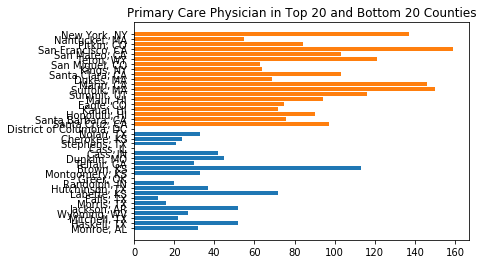

In [20]:
# Plot
plt.barh(bottom_county_data['County'], bottom_county_data['PCP Rate'])

plt.barh(top_county_data['County'], top_county_data['PCP Rate'])
plt.title("Primary Care Physician in Top 20 and Bottom 20 Counties")

In [21]:
# Make plot prettier

In [22]:
# Export plot

# Dentist Rate
dentist per 100,000 population

In [23]:
# Get specific health factor data

dentist_rate_df = health_factor_df[["County", "Dentist Rate"]]
dentist_rate_df.head()

,County,Dentist Rate
0,"Autauga, AL",32.0
1,"Baldwin, AL",49.0
2,"Barbour, AL",35.0
3,"Bibb, AL",22.0
4,"Blount, AL",19.0


In [24]:
# Make merge for plotting

top_county_data = pd.merge(top_county_clean, dentist_rate_df, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, dentist_rate_df, on='County', how='left')
bottom_county_data.head()

,County,Dentist Rate
0,"Monroe, AL",23.0
1,"Haskell, TX",35.0
2,"Mitchell, TX",11.0
3,"Wyoming, WV",18.0
4,"Jackson, AR",35.0


In [25]:
# Get p-value
pop1 = top_county_data['Dentist Rate']
pop2= bottom_county_data['Dentist Rate']
pop1.fillna(0,inplace=True)
pop2.fillna(0,inplace=True)
stats.ttest_ind(pop1, pop2, equal_var=False)

Ttest_indResult(statistic=4.783290799929889, pvalue=6.79033608528063e-05)

Text(0.5, 1.0, 'Dentist Rate in Top 20 and Bottom 20 Counties')

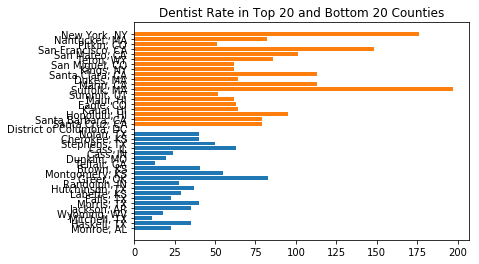

In [26]:
# Plot

plt.barh(bottom_county_data['County'], bottom_county_data['Dentist Rate'])

plt.barh(top_county_data['County'], top_county_data['Dentist Rate'])
plt.title("Dentist Rate in Top 20 and Bottom 20 Counties")

In [27]:
# Make plot prettier

In [28]:
# Export plot

# MHP Rate
mental health provider per 100,000 population

In [29]:
# Get specific health factor data

MHP_rate = health_factor_df[["County", "MHP Rate"]]
MHP_rate.head()

,County,MHP Rate
0,"Autauga, AL",13.0
1,"Baldwin, AL",89.0
2,"Barbour, AL",8.0
3,"Bibb, AL",9.0
4,"Blount, AL",9.0


In [30]:
# Make merge for plotting

top_county_data = pd.merge(top_county_clean, MHP_rate, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, MHP_rate, on='County', how='left')
bottom_county_data.head()

,County,MHP Rate
0,"Monroe, AL",70.0
1,"Haskell, TX",53.0
2,"Mitchell, TX",NaN
3,"Wyoming, WV",23.0
4,"Jackson, AR",105.0


In [31]:
# Get p-value
pop1 = top_county_data['MHP Rate']
pop2= bottom_county_data['MHP Rate']
pop1.fillna(0,inplace=True)
pop2.fillna(0,inplace=True)
stats.ttest_ind(pop1, pop2, equal_var=False)

Ttest_indResult(statistic=4.558631960513974, pvalue=9.65276576345542e-05)

Text(0.5, 1.0, 'Mental Health Provider in Top 20 and Bottom 20 Counties')

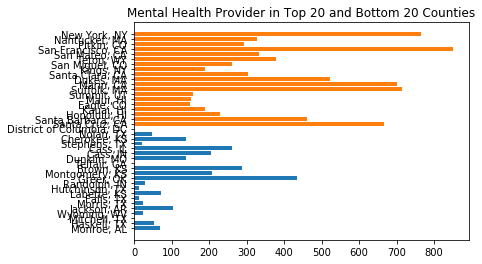

In [32]:
# Plot

plt.barh(bottom_county_data['County'], bottom_county_data['MHP Rate'])

plt.barh(top_county_data['County'], top_county_data['MHP Rate'])
plt.title("Mental Health Provider in Top 20 and Bottom 20 Counties")

In [33]:
# Make plot prettier

In [34]:
# Export plot

# Percent Smokers

In [35]:
# Get specific health factor data

smokers = health_factor_df[["County", "% Smokers"]]
smokers.head()

,County,% Smokers
0,"Autauga, AL",19
1,"Baldwin, AL",17
2,"Barbour, AL",22
3,"Bibb, AL",20
4,"Blount, AL",20


In [36]:
# Make merge for plotting

top_county_data = pd.merge(top_county_clean, smokers, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, smokers, on='County', how='left')
bottom_county_data.head()

,County,% Smokers
0,"Monroe, AL",22
1,"Haskell, TX",16
2,"Mitchell, TX",14
3,"Wyoming, WV",25
4,"Jackson, AR",24


In [37]:
# Get p-value
pop1 = top_county_data['% Smokers']
pop2= bottom_county_data['% Smokers']
pop1.fillna(0,inplace=True)
pop2.fillna(0,inplace=True)
stats.ttest_ind(pop1, pop2, equal_var=False)

Ttest_indResult(statistic=-7.197488761614651, pvalue=1.3320002580704204e-08)

Text(0.5, 1.0, 'Percent Smokers in Top 20 and Bottom 20 Counties')

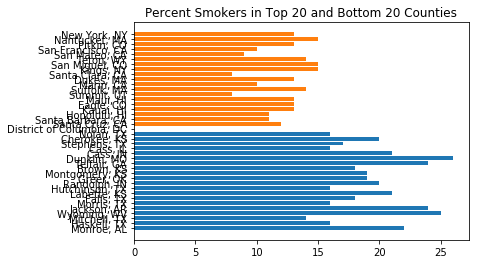

In [38]:
# Plot

plt.barh(bottom_county_data['County'], bottom_county_data['% Smokers'])

plt.barh(top_county_data['County'], top_county_data['% Smokers'])
plt.title("Percent Smokers in Top 20 and Bottom 20 Counties")

In [39]:
# Make plot prettier

In [40]:
# Export plot

# Adult Obesity
- Percentage of adults that report BMI >= 30

In [41]:
# Get specific health factor data

obese = health_factor_df[["County", "% Obese"]]
obese.head()

,County,% Obese
0,"Autauga, AL",36
1,"Baldwin, AL",29
2,"Barbour, AL",44
3,"Bibb, AL",38
4,"Blount, AL",36


In [42]:
# Make merge for plotting

top_county_data = pd.merge(top_county_clean, obese, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, obese, on='County', how='left')
bottom_county_data.head()

,County,% Obese
0,"Monroe, AL",39
1,"Haskell, TX",28
2,"Mitchell, TX",30
3,"Wyoming, WV",41
4,"Jackson, AR",34


In [43]:
# Get p-value
pop1 = top_county_data['% Obese']
pop2= bottom_county_data['% Obese']
pop1.fillna(0,inplace=True)
pop2.fillna(0,inplace=True)
stats.ttest_ind(pop1, pop2, equal_var=False)

Ttest_indResult(statistic=-10.789052996501393, pvalue=1.2366097095361674e-12)

Text(0.5, 1.0, 'Percent Obese in Top 20 and Bottom 20 Counties')

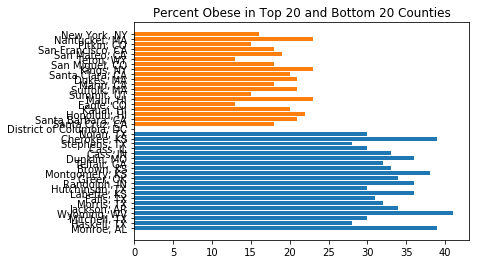

In [44]:
# Plot

plt.barh(bottom_county_data['County'], bottom_county_data['% Obese'])

plt.barh(top_county_data['County'], top_county_data['% Obese'])
plt.title("Percent Obese in Top 20 and Bottom 20 Counties")

In [45]:
# Make plot prettier

In [46]:
# Export plot

# Teen Birth Rate
- Births per 1,000 females ages 15-19

In [47]:
# Get specific health factor data

teen_birth = health_factor_df[["County", "Teen Birth Rate"]]
teen_birth.head()

,County,Teen Birth Rate
0,"Autauga, AL",28.0
1,"Baldwin, AL",32.0
2,"Barbour, AL",50.0
3,"Bibb, AL",47.0
4,"Blount, AL",40.0


In [48]:
# Make merge for plotting

top_county_data = pd.merge(top_county_clean, teen_birth, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, teen_birth, on='County', how='left')
bottom_county_data.head()

,County,Teen Birth Rate
0,"Monroe, AL",45.0
1,"Haskell, TX",40.0
2,"Mitchell, TX",72.0
3,"Wyoming, WV",47.0
4,"Jackson, AR",68.0


In [49]:
# Get p-value
pop1 = top_county_data['Teen Birth Rate']
pop2= bottom_county_data['Teen Birth Rate']
pop1.fillna(0,inplace=True)
pop2.fillna(0,inplace=True)
stats.ttest_ind(pop1, pop2, equal_var=False)

Ttest_indResult(statistic=-11.97730622586336, pvalue=1.091868690197931e-13)

Text(0.5, 1.0, 'Teen Birth Rate in Top 20 and Bottom 20 Counties')

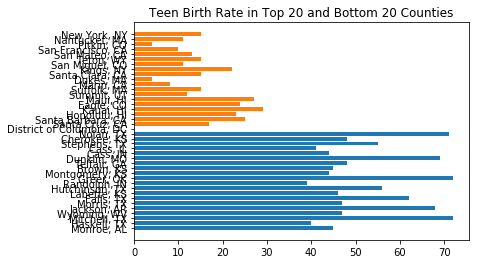

In [50]:
# Plot

plt.barh(bottom_county_data['County'], bottom_county_data['Teen Birth Rate'])

plt.barh(top_county_data['County'], top_county_data['Teen Birth Rate'])
plt.title("Teen Birth Rate in Top 20 and Bottom 20 Counties")

In [51]:
# Make plot prettier

In [52]:
# Export plot

# Percent Low Birth Weight
- Percentage of births with low birth weight (<2500g)

In [53]:
# Get specific health factor data

LBW = health_factor_df[["County", "% LBW"]]
LBW.head()

,County,% LBW
0,"Autauga, AL",9.0
1,"Baldwin, AL",8.0
2,"Barbour, AL",12.0
3,"Bibb, AL",11.0
4,"Blount, AL",8.0


In [54]:
# Make merge for plotting

top_county_data = pd.merge(top_county_clean, LBW, on='County', how='left')
bottom_county_data = pd.merge(bottom_county_clean, LBW, on='County', how='left')
bottom_county_data.head()

,County,% LBW
0,"Monroe, AL",14.0
1,"Haskell, TX",6.0
2,"Mitchell, TX",9.0
3,"Wyoming, WV",12.0
4,"Jackson, AR",9.0


In [55]:
# Get p-value
pop1 = top_county_data['% LBW']
pop2= bottom_county_data['% LBW']
pop1.fillna(0,inplace=True)
pop2.fillna(0,inplace=True)
stats.ttest_ind(pop1, pop2, equal_var=False)

Ttest_indResult(statistic=-3.150896941339796, pvalue=0.0031741824500950764)

Text(0.5, 1.0, 'Percent Low Birth Rate in Top 20 and Bottom 20 Counties')

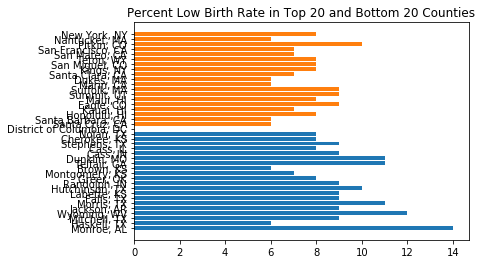

In [56]:
# Plot

plt.barh(bottom_county_data['County'], bottom_county_data['% LBW'])

plt.barh(top_county_data['County'], top_county_data['% LBW'])
plt.title("Percent Low Birth Rate in Top 20 and Bottom 20 Counties")

In [57]:
# Make plot prettier

In [58]:
# Export plot